In [1]:
import pandas as pd
product_review=pd.read_csv(r'C:/Users/hegde/Downloads/Flipkart2.csv')
product_review.head(15)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hegde/Downloads/Flipkart2.csv'

In [3]:
product_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
dtypes: object(5)
memory usage: 7.8+ MB


In [4]:
product_review.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
dtype: int64

In [5]:
# Remove rows with any null values
product_review = product_review.dropna()


In [6]:
product_review.describe()

,product_name,product_price,Rate,Review,Summary
count,180379,180379,180379,180379,180379
unique,841,479,8,1324,85306
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good
freq,6005,9150,105641,9014,15146


In [7]:
# Convert 'Rate' column to numeric, errors='coerce' will handle non-numeric values by converting them to NaN
product_review['Rate'] = pd.to_numeric(product_review['Rate'], errors='coerce')

# Create a new feature 'Label' based on the 'Rate' column
product_review['Label'] = product_review['Rate'].apply(lambda x: 'Negative' if x <= 3 else 'Positive')

# Display the first 10 rows of the updated DataFrame
product_review.head(10)




,product_name,product_price,Rate,Review,Summary,Label
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,super!,great cooler excellent air flow and for this p...,Positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,awesome,best budget 2 fit cooler nice cooling,Positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,the quality is good but the power of air is de...,Negative
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1.0,useless product,very bad product its a only a fan,Negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,ok ok product,Negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,awesome,the cooler is really fantastic and provides go...,Positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,highly recommended,very good product,Positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,nice,very nice,Negative
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1.0,unsatisfactory,very bad cooler,Negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4.0,worth the money,very good,Positive


In [8]:
product_review.shape

(180379, 6)

In [10]:
# let's have a look at some values in the Review column

reviews.loc[0, 'Review']

'super!'

In [11]:
reviews.loc[5, 'Review']

'awesome'

Label
Positive    0.790613
Negative    0.209387
Name: proportion, dtype: float64


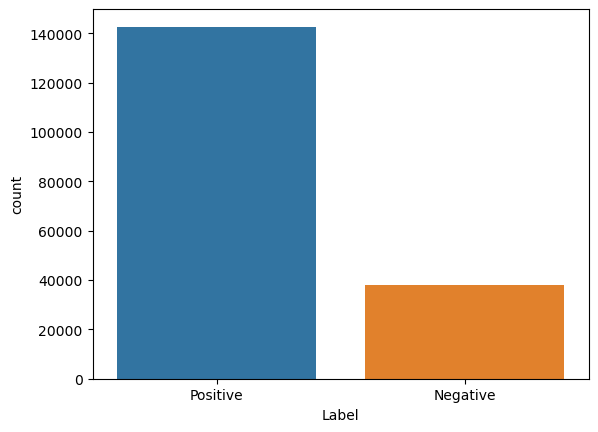

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# distribution of our target variable

print(reviews['Label'].value_counts(normalize=True))

sns.countplot(x='Label', data = reviews)
plt.show()

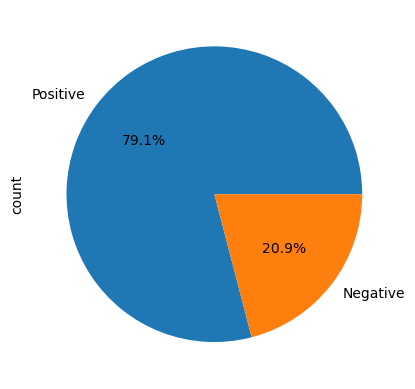

In [13]:
reviews.Label.value_counts().plot.pie(autopct="%.1f%%")
# plt.legend(Label, title="Label", loc="best")
plt.show()

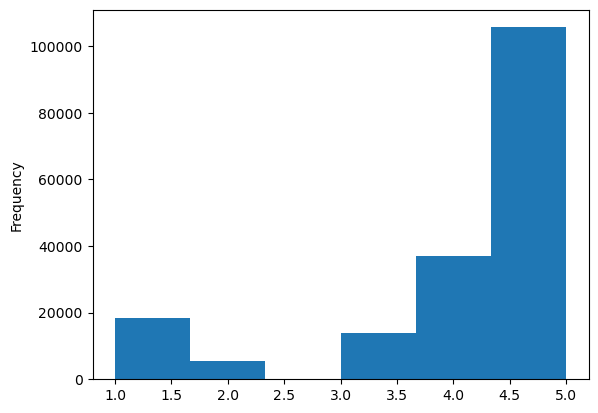

In [14]:
product_review.Rate.plot.hist(bins=6) #bins groups salary values into 6 intervals

plt.show()

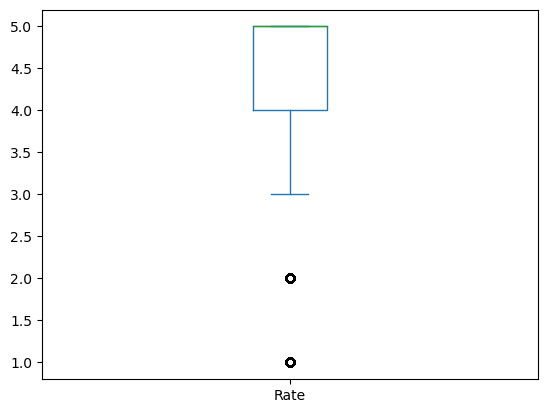

In [15]:
product_review.Rate.plot.box()
plt.show()

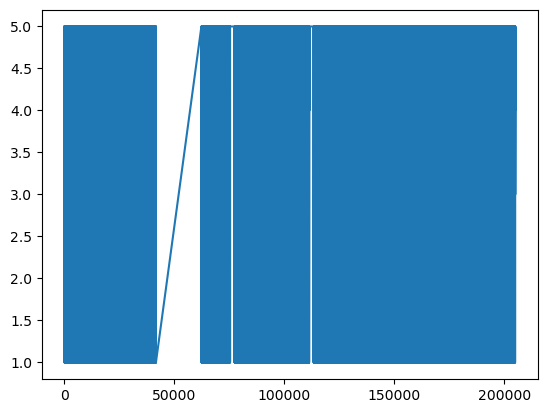

In [16]:
product_review.Rate.plot.line()
plt.show()

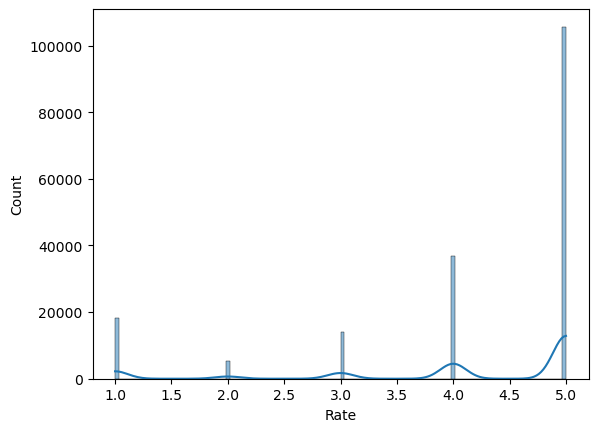

In [19]:
sns.histplot(data=product_review,x='Rate',kde=True)
plt.show()

In [20]:
#  Creating a new dataframe

reviews = product_review[['Review', 'Label']]
reviews

,Review,Label
0,super!,Positive
1,awesome,Positive
2,fair,Negative
3,useless product,Negative
4,fair,Negative
...,...,...
205047,must buy!,Positive
205048,super!,Positive
205049,nice,Negative
205050,just wow!,Positive


# identifying the input x and output y

In [17]:
#renaming the Review column
reviews = reviews.rename(columns={'Review': 'Review'})

X = reviews.Review #this column contains textual data to extract reviews from 
y = reviews.Label #this is the column we are learning to predict

print(X.shape, y.shape)

(180379,) (180379,)


In [18]:
reviews

,Review,Label
0,super!,Positive
1,awesome,Positive
2,fair,Negative
3,useless product,Negative
4,fair,Negative
...,...,...
205047,must buy!,Positive
205048,super!,Positive
205049,nice,Negative
205050,just wow!,Positive


# Step 3: Data Preparation - Split the data into train and test set

In [19]:
# splitting into train and test

from sklearn.model_selection import train_test_split

#splitting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

#random_state is used to ensure that data splitting process is reproducible. 
#that is, no matter how many times the code is run, you will get the same split of data each time

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(144303,) (36076,)
(144303,) (36076,)


# Step 4: Data preprocessing on train data(X_train)

In [20]:
# importing libaries
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [21]:
#intializing the lemmatizer object
lemmatizer = WordNetLemmatizer()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming clean is a function that preprocesses the text data (e.g., lowercasing, removing punctuation)
def clean(text):
    # Example of a simple preprocessing function
    return text.lower()

# Instantiate a vectorizer and pass the custom cleaning function to the preprocessor argument
vect = CountVectorizer(preprocessor=clean)

# Use it to extract features from the training data
X_train_num = vect.fit_transform(X_train)

# Print the shape of the resulting matrix
print(X_train_num.shape)



(144303, 1162)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(preprocessor=clean)
X_train_num = vect.fit_transform(X_train)
print(X_train_num.shape)
# X_test_num = vect.transform(X_test)


(144303, 1162)


# Step 5: Data preprocessing on test data(X_test)

In [27]:
X_test_num = vect.transform(X_test)
print(X_test_num.shape)


(36076, 1162)


# Logistic regression

In [28]:
#a. feeding the train data into the logistic regression algorithm

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced', random_state=42)
classifier.fit(X_train_num, y_train)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [29]:
#b. now, predict the values of y using the x_train
y_train_pred = classifier.predict(X_train_num)

In [30]:
#c. predicting the values of y using the x_test data
y_test_pred = classifier.predict(X_test_num)

In [31]:
# Evaluating on Train Data

from sklearn.metrics import accuracy_score, classification_report

train_acc_score = accuracy_score(y_train, y_train_pred)

print(classification_report(y_train, y_train_pred))

print('train_acc_score:',train_acc_score)

              precision    recall  f1-score   support

    Negative       0.85      1.00      0.92     30190
    Positive       1.00      0.95      0.98    114113

    accuracy                           0.96    144303
   macro avg       0.92      0.97      0.95    144303
weighted avg       0.97      0.96      0.96    144303

train_acc_score: 0.9615600507265961


In [32]:
# Evaluating on Test Data

from sklearn.metrics import accuracy_score, classification_report

test_acc_score = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

print('test_acc_score:',test_acc_score)

              precision    recall  f1-score   support

    Negative       0.85      1.00      0.91      7579
    Positive       1.00      0.95      0.97     28497

    accuracy                           0.96     36076
   macro avg       0.92      0.97      0.94     36076
weighted avg       0.97      0.96      0.96     36076

test_acc_score: 0.9609712828473224


# 2. Random Forest

In [33]:
#a. feeding the train data into the random forest algorithm

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train_num, y_train)

RandomForestClassifier()

In [34]:
#b. now, predict the values of y using the x_train

y_train_pred = classifier2.predict(X_train_num)

In [35]:
#c. predicting the values of y using the x_test data

y_test_pred = classifier2.predict(X_test_num)

In [36]:
# Evaluating on Train Data

from sklearn.metrics import accuracy_score, classification_report

train_acc_score2 = accuracy_score(y_train, y_train_pred)

print(classification_report(y_train, y_train_pred))

print('train_acc_score2:',train_acc_score2)

              precision    recall  f1-score   support

    Negative       0.99      0.94      0.97     30190
    Positive       0.98      1.00      0.99    114113

    accuracy                           0.99    144303
   macro avg       0.99      0.97      0.98    144303
weighted avg       0.99      0.99      0.99    144303

train_acc_score2: 0.9864729077011566


In [37]:
# Evaluating on Test Data

from sklearn.metrics import accuracy_score, classification_report

test_acc_score2 = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

print('test_acc_score2:',test_acc_score2)

              precision    recall  f1-score   support

    Negative       0.99      0.94      0.97      7579
    Positive       0.98      1.00      0.99     28497

    accuracy                           0.99     36076
   macro avg       0.99      0.97      0.98     36076
weighted avg       0.99      0.99      0.99     36076

test_acc_score2: 0.9859463355139151


# 3. Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier3= MultinomialNB()
classifier3.fit(X_train_num,y_train)

MultinomialNB()

In [39]:
#predict the values of y using the x_train

y_train_pred = classifier3.predict(X_train_num)

In [40]:
#predicting the values of y using the x_test data

y_test_pred = classifier2.predict(X_test_num)

In [41]:
# Evaluation of the train and test data using Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

confusion_matrix(y_train, y_train_pred)

array([[ 24214,   5976],
       [   233, 113880]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

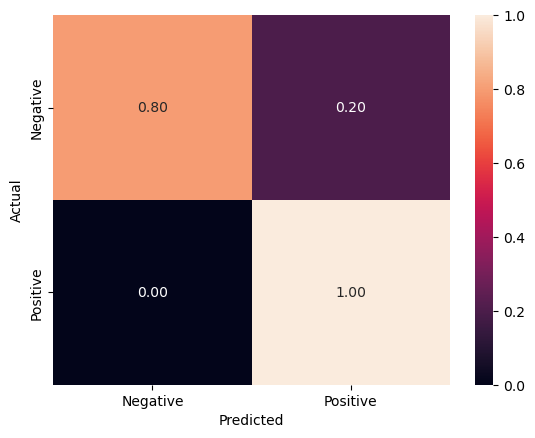

In [42]:
cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier3.classes_, yticklabels=classifier3.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

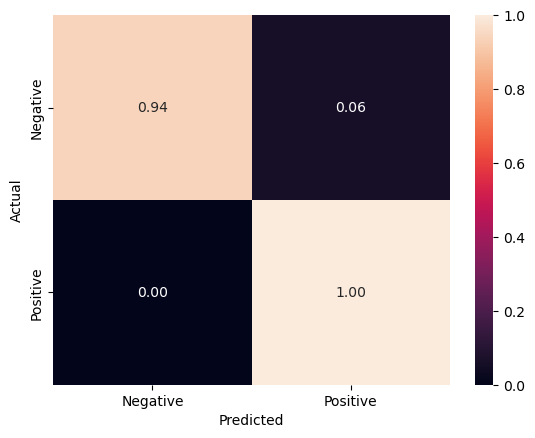

In [43]:
cm = confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier3.classes_, yticklabels=classifier3.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Creating an Optimal Workflow
Implementing various Algorithms to find the Best Model

In [44]:
# importing libraries

from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec
from sklearn.metrics import f1_score

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# 1. Defining a memory object to cache Intermediate results

cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# 2. Defining the pipleine for data preprocessing and model building
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

#3. Defining a parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1500, 2000, 2500], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1500, 2000, 2500],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1500, 2000, 2500], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

#4. Perform GridSearchCV for each algorithm

best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, pos_label='Positive')  
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 47.4 s
Wall time: 1min 15s
F1 Score on Test Data: 0.9725514339951772
********** decision_tree **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 3min 4s
Wall time: 4min 25s
F1 Score on Test Data: 0.9910424871911053
********** logistic_regression **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [48]:
#now we want to see the best models from each algorithn in the hyper parameter tuning process above

for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier())])



In [49]:
import joblib
import os
from sklearn.metrics import f1_score

# Directory to save the models
save_dir = 'Predictive_Model'

# Check if the directory exists; if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Assuming best_models is a dictionary with model names as keys and model objects as values
# Example: best_models = {'model1': trained_model1, 'model2': trained_model2}
for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    # Save the model using joblib
    model_path = os.path.join(save_dir, f'{name}.pkl')
    joblib.dump(model, model_path)
    
    # Load the saved model to ensure it was saved correctly
    loaded_model = joblib.load(model_path)
    
    # Optionally, evaluate the model to ensure it's loaded correctly
    # Assuming you have X_test and y_test available for evaluation
    # y_pred = loaded_model.predict(X_test)
    # f1 = f1_score(y_test, y_pred)
    # print(f"F1 score for {name}: {f1}")

print("Models saved and loaded successfully!")


********** naive_bayes **********
********** decision_tree **********
Models saved and loaded successfully!


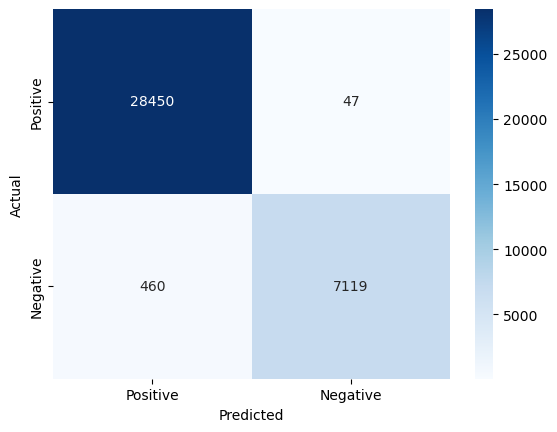

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred, labels=['Positive', 'Negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
